In [2]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32 

#인풋이미지는 한 인스턴스 당 28x28=784개의 feature를 가지므로 shape을 다음과 같이 정해준다.
input_img = Input(shape=(784,))

#인코더와 디코더를 각각 한 층으로 쌓아준다.
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

#최종 오토인코더 모형은 인풋부터 인코더, 디코더의 아웃풋까지 연결해준다.
autoencoder = Model(input_img, decoded)

In [3]:
#다음과 같이 인코더와 디코더를 분리해서 정의해놓는 것도 가능하다.
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
#MNIST dataset의 x입력값들을 28x28=784의 크기로 벡터화한다.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
#위에서 정의한 오토인코더 모형 학습
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2729 - val_loss: 0.1880
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1698 - val_loss: 0.1525
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1432 - val_loss: 0.1327
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1278 - val_loss: 0.1206
Epoch 5/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1179 - val_loss: 0.1125
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1111 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1062 - val_loss: 0.1026
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1024 - val_loss: 0.0994
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0996 - val_loss: 0.0970
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0976 - val_lo

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

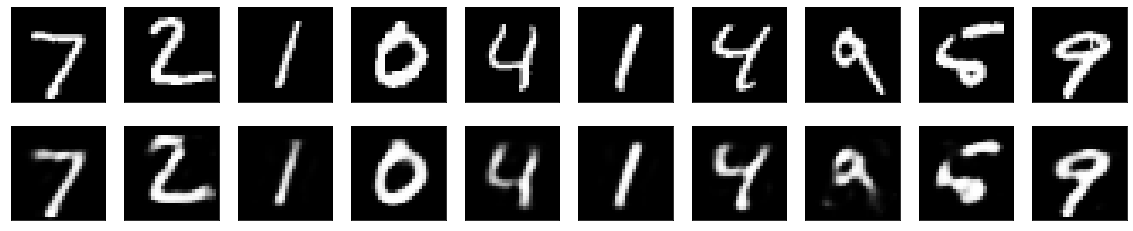

In [9]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()